# <font color=darkred> Explore-exploit dilemma </font>

## <font color=darkblue> Epsilon-greedy Algorithm on a Bernoulli distribution</font>

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [83]:
bandit_probability = [0.2,0.5,0.75]
bandit_est_prob=[0,0,0]
bandit_tries = [0,0,0]
N_tries=10000
epsilon=0.1
win_rate = np.zeros(N_tries)
reward_vector=np.zeros(N_tries)
total_reward = 0
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
optimal_bandit = bandit_probability.index(max(bandit_probability))

In [84]:
#returns 1 (success) with the probability of the slot machine picked up and 0 otherwise
# i is the parameter representing the slot machine which is played

def pull(i):
    global total_reward
    bandit_tries[i]+=1 
    est = random.random()
    if est < bandit_probability[i]:
        x = 1     #x is the reward of the slot machine which is either 0 or 1
        total_reward+=1
        return(x)
    else : 
        x = 0
        return(x)  

In [85]:
#This function updates the estimated win rates of the slot machines, by calculating the samples mean

def update(i,x):
    bandit_est_prob[i] = (1/bandit_tries[i])*(bandit_est_prob[i]*(bandit_tries[i]-1)+x)

In [86]:
def epsilon_greedy():
    global num_optimal, num_times_exploited, num_times_explored
    for i in range (N_tries):
        alea = random.random()
        if alea < epsilon:
            j = random.randrange(0,3)
            num_times_explored+=1
        else:
            j = bandit_est_prob.index(max(bandit_est_prob))
            num_times_exploited+=1
        if j == optimal_bandit:
            num_optimal+=1
        reward = pull(j)
        reward_vector[i]=reward
        update(j,reward)

In [87]:
epsilon_greedy()

The total reward earned is 7269
The overall win rate is 72.69%
The number of times the slot machine was randomly chosen, so the number of times explored is 948
The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is 9052
The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is 93.33%


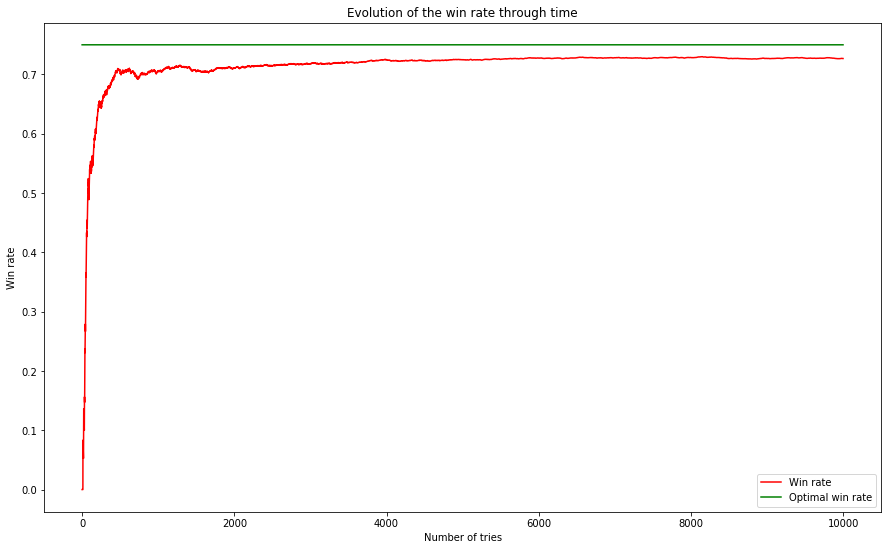

In [88]:
print("The total reward earned is "+str(total_reward))
print("The overall win rate is "+str(100*total_reward/N_tries)+"%")
print("The number of times the slot machine was randomly chosen, so the number of times explored is "+str(num_times_explored))
print("The number of times the slot machine was chosen by the 'greeedy way', so the number of times exploited is "+str(num_times_exploited))
print("The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is "+str(100*num_optimal/N_tries)+"%")

win_rate=np.cumsum(reward_vector)/(np.arange(N_tries)+1)
optimal_win_rate=np.ones(N_tries)*max(bandit_probability)

plt.figure(figsize=(15, 9))
plt.plot(win_rate[:], 'r', lw=1.5, label='Win rate')
plt.plot(optimal_win_rate[:], 'g', lw=1.5, label='Optimal win rate')
plt.xlabel('Number of tries')
plt.ylabel('Win rate')
plt.legend()
plt.title("Evolution of the win rate through time")
plt.show()